# Project: Mapping the State-Space of Stem Cell "Decisions"

### 1. Background : Stem Cell Differentiation
In biology, every cell in your body contains the same "source code" (DNA). However, a heart cell behaves differently from a neuron because they are "executing" different parts of that code. However, in order to reach their fates ('final' cell type), cells undergo a journey, the so called **cell differenciation** or **cell specification**. 

Biologists often use the **Waddington Landscape** analogy: imagine a ball rolling down a hilly terrain. At the top (0h), the ball can go down many different valleys. By the bottom (168h), the ball is stuck in one specific path.

![alt text](waddington2.png)


### 2. Data

We quantify this execution by measuring the levels of **Gene Expression** throughout development.

In the current project, the data follows **Mouse Embryonic Stem Cells (ESCs)** over a period of 7 days (168 hours). 
At $T=0$, the cells are "Pluripotent"—think of them as uninitialized objects that have the potential to become almost any tissue type. As time progresses, they interprete gene expression levels as signals to **differentiate**. At the end of the experiement, we get two cell types: **E14** and **R1**.

The **Single-Cell Gene Expression** dataset at our disposal is the following. 
*   **Dimensions:** Each cell is a data object described by **96 features** (different marker genes, in addition to time and type of cell).

| Feature | Type | Description |
| :--- | :--- | :--- |
| **Time** | `int` | The timestamp of the snapshot (0h, 24h, 48h, 72h, 96h, 120h, 168h). |
| **Type** | `string` | The cell line background (**E14** or **R1**). These are two different "classes" of stem cells. |
| **Genes** | `float` | **96 columns** (e.g., *Actb, Nanog, Sox2...*). These represent the normalized expression level of specific genes. |


*** 
*Data Source & Paper: Patrick S. Stumpf, "Stem Cell Differentiation as a Non-Markov Stochastic Process," Cell Systems, 2017.*

### Part 1. Load the dataset
Read the "gene_expression_data.csv" dataset into a pandas dataframe. 

Once loaded, you can use the "head()", "info()" or "describe()" functions for an overview of the dataset and its summary statistics. Below is an example result of head() applied to the dataset.

![alt text](head.png)

Tip: Because the dataset, although high-dimensional, only has 96 columns, you can also open the dataset using Excel and view it in tabular form by using the the "text-to-columns" feature of MS Excel (https://www.youtube.com/watch?v=QyZ6IMkln2U).

In [6]:
########## Part 1. Write your code in this cell ############
import pandas as pd
df = pd.read_csv("gene_expression_data.csv")
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 100 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample       672 non-null    object 
 1   Time         672 non-null    int64  
 2   Type         672 non-null    object 
 3   Actb         672 non-null    float64
 4   Bmi1         672 non-null    float64
 5   Bmp4         672 non-null    float64
 6   Bmp7         672 non-null    float64
 7   Bmpr1a       672 non-null    float64
 8   Cd34         672 non-null    float64
 9   Cdh1         672 non-null    float64
 10  Cdh2         672 non-null    float64
 11  Cdk2         672 non-null    float64
 12  Cdx2         672 non-null    float64
 13  Cldn6        672 non-null    float64
 14  Ctcf         672 non-null    float64
 15  Ctnnb1       672 non-null    float64
 16  Dnmt1        672 non-null    float64
 17  Dnmt3b       672 non-null    float64
 18  Dppa3        672 non-null    float64
 19  Dppa4  

### Part 2. Visualize some data
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all genes. In this part, we will restrict our focus on two genes: "Bmp4" and "Nanog".

Create a figure with two plots (one for each gene), where each plot shows, at each time (0H, 24H, ..., 168H), the statistics of expresssion levels of the genes in cells. What plot types are appropriate for this ?
Hint: you may want to have time on the x-asis  

Bonus: There are two types of cells in the dataset (E14 and R1). Can you enhance the plot to visualize the expression levels within each cell type ? What do you observe ?

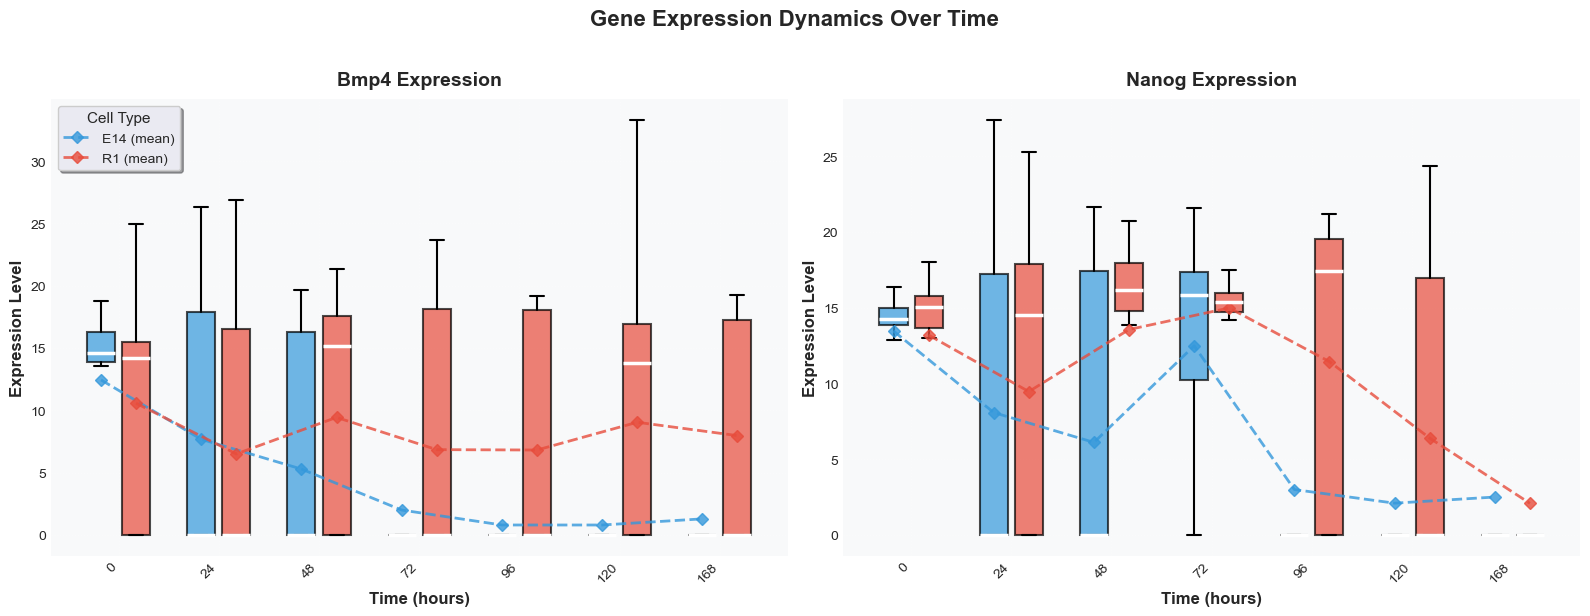

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

genes_to_plot = ["Bmp4", "Nanog"]
times = sorted(df["Time"].unique())
cell_types = sorted(df["Type"].unique())


fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Gene Expression Dynamics Over Time', fontsize=16, fontweight='bold', y=1.02)

colors = {'E14': '#3498db', 'R1': '#e74c3c'}  # Blue and Red


for idx, (ax, gene) in enumerate(zip(axes, genes_to_plot)):
    positions = np.arange(len(times))
    width = 0.35
    
  
    box_data = {ct: [] for ct in cell_types}
    for t in times:
        for cell_type in cell_types:
            data = df[(df["Time"] == t) & (df["Type"] == cell_type)][gene].dropna().values
            box_data[cell_type].append(data)
    
    
    for j, cell_type in enumerate(cell_types):
        bp = ax.boxplot(
            box_data[cell_type],
            positions=positions + (j - 0.5) * width,
            widths=width * 0.8,
            patch_artist=True,
            showfliers=False,
            medianprops=dict(color='white', linewidth=2.5),
            boxprops=dict(facecolor=colors.get(cell_type, f'C{j}'), 
                         alpha=0.7, 
                         edgecolor='black', 
                         linewidth=1.5),
            whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5)
        )
    
    
    for j, cell_type in enumerate(cell_types):
        means = [df[(df["Time"] == t) & (df["Type"] == cell_type)][gene].mean() 
                for t in times]
        ax.plot(positions + (j - 0.5) * width, means, 
               marker='D', markersize=6, 
               linestyle='--', linewidth=2, 
               color=colors.get(cell_type, f'C{j}'),
               alpha=0.8, label=f'{cell_type} (mean)')
    
    
    ax.set_title(f'{gene} Expression', fontsize=14, fontweight='bold', pad=10)
    ax.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Expression Level', fontsize=12, fontweight='bold')
    ax.set_xticks(positions)
    ax.set_xticklabels(times, rotation=45, ha='right')
    ax.tick_params(labelsize=10)
    ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)
    
    
    if idx == 0:
        ax.legend(loc='upper left', frameon=True, shadow=True, 
                 fontsize=10, title='Cell Type', title_fontsize=11)
    
    
    ax.set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

### Part 3. Relationships between genes
Because the dataset is high-dimensional (cells are described across 96 genes), we canNOT visualize all relationships between our variables (genes). However, as in almost every real-world datasets, variables entertain strong or weak relations. In this part, we will try to identity which genes that have strong ties, and attempt to visualize how the behave together.

Once more, because the dataset is multi-dimensional, we will restrict our analysis to the subset of genes (although we can get away with an analysis of the whole set of genes in our current scenario of 96 genes) 

    genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4'].

Create a figure with the following plots:

1. A **correlation heatmap** showing the correlations of all genes above at time O
2. A **correlation heatmap** showing the correlations of all genes above at time 168
3. From the first plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 168. What do you observe ?
4. From the second plot, pick the two genes with the highest correlation and create a **scatter plot** of both. Does the scatter trend verify the observed correlation ? Compare their correlation at time 0. What do you observe ?

Bonus: i.Think about improvements you could make on the scatter plots. What comes to mind ? Create a figure with two plots (Hint: different colors and/or markers for the two different cell types, etc.)
ii. How does the relationship of the 2 genes picked at (3.) evolve through all time points (0,24,48,72,69,120,144,168) ? What plot(s) can you use for this ? 

C:\Users\ah616\AppData\Local\Temp\ipykernel_16904\1920957464.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


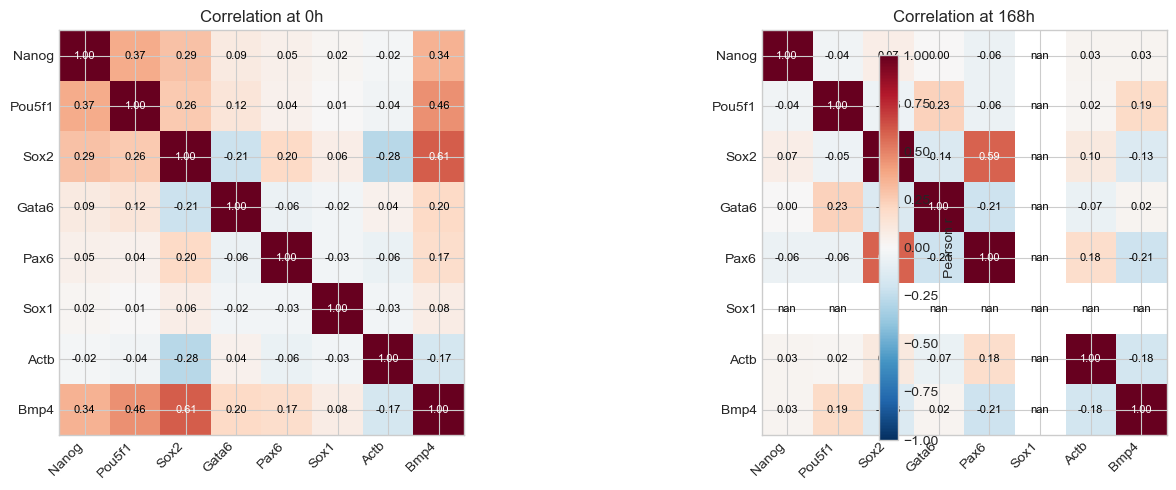

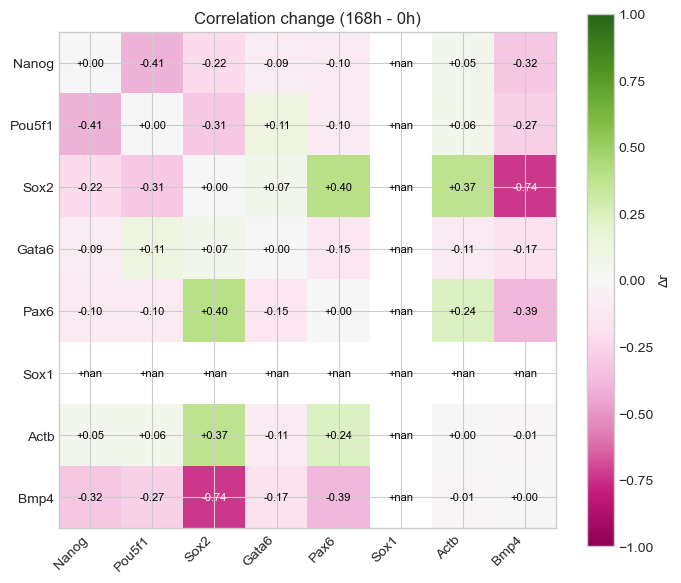

Top pair at 0h:   Sox2 vs Bmp4 (r = +0.605)
Top pair at 168h: Sox2 vs Pax6 (r = +0.594)


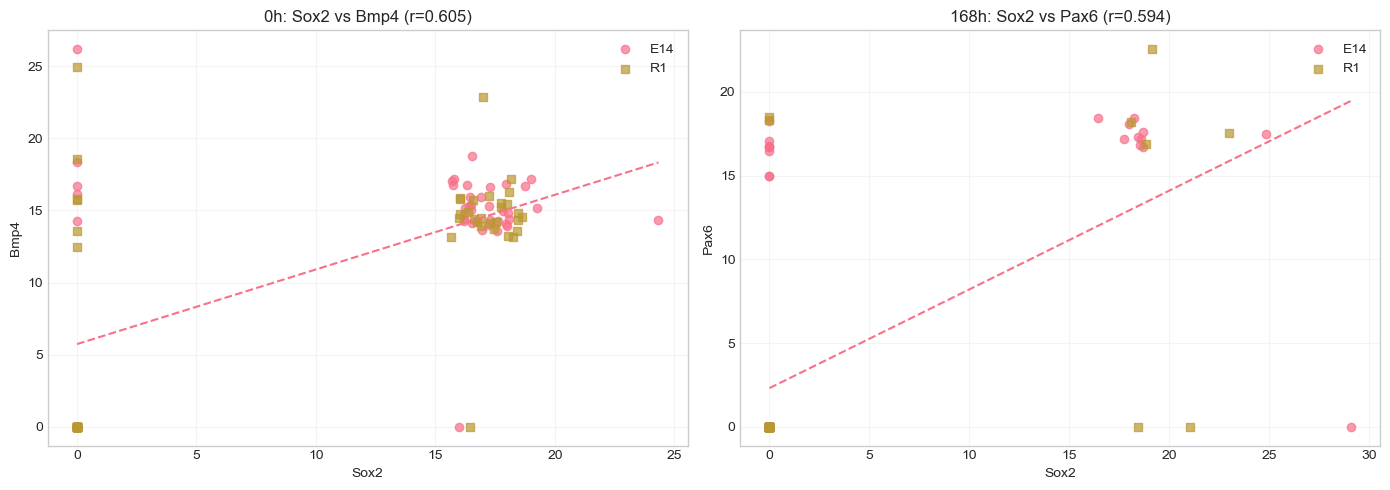

In [17]:
import numpy as np
import matplotlib.pyplot as plt


genes = ['Nanog', 'Pou5f1', 'Sox2', 'Gata6', 'Pax6', 'Sox1', 'Actb', 'Bmp4']

def corr_at_time(t):
    """Correlation matrix of selected genes at time t."""
    return df[df["Time"] == t][genes].corr()

def top_pair(corr):
    """Most strongly correlated pair (by absolute value), excluding diagonal."""
    c = corr.copy().values
    np.fill_diagonal(c, np.nan)
    i, j = np.unravel_index(np.nanargmax(np.abs(c)), c.shape)
    return genes[i], genes[j], corr.iloc[i, j]

def heatmap(ax, mat, title, fmt="{:.2f}"):
    """Simple annotated heatmap."""
    im = ax.imshow(mat.values, vmin=-1, vmax=1, cmap="RdBu_r")
    ax.set_title(title)
    ax.set_xticks(range(len(genes)))
    ax.set_yticks(range(len(genes)))
    ax.set_xticklabels(genes, rotation=45, ha="right")
    ax.set_yticklabels(genes)

    
    for i in range(len(genes)):
        for j in range(len(genes)):
            val = mat.values[i, j]
            color = "white" if abs(val) > 0.5 else "black"
            ax.text(j, i, fmt.format(val), ha="center", va="center", fontsize=8, color=color)
    return im


corr0 = corr_at_time(0)
corr168 = corr_at_time(168)
corr_diff = corr168 - corr0

 #1) HEATMAPS: 0h vs 168h 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
im0 = heatmap(axes[0], corr0, "Correlation at 0h")
im1 = heatmap(axes[1], corr168, "Correlation at 168h")
plt.colorbar(im1, ax=axes.ravel().tolist(), label="Pearson r")
plt.tight_layout()
plt.show()

#  2) HEATMAP: CHANGE (168h - 0h
fig, ax = plt.subplots(figsize=(7, 6))
im = ax.imshow(corr_diff.values, vmin=-1, vmax=1, cmap="PiYG")
ax.set_title("Correlation change (168h - 0h)")
ax.set_xticks(range(len(genes)))
ax.set_yticks(range(len(genes)))
ax.set_xticklabels(genes, rotation=45, ha="right")
ax.set_yticklabels(genes)

for i in range(len(genes)):
    for j in range(len(genes)):
        val = corr_diff.values[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        ax.text(j, i, f"{val:+.2f}", ha="center", va="center", fontsize=8, color=color)

plt.colorbar(im, ax=ax, label="Δr")
plt.tight_layout()
plt.show()
#3) SCATTER: TOP PAISR
g1_0, g2_0, r0 = top_pair(corr0)
g1_168, g2_168, r168 = top_pair(corr168)

print(f"Top pair at 0h:   {g1_0} vs {g2_0} (r = {r0:+.3f})")
print(f"Top pair at 168h: {g1_168} vs {g2_168} (r = {r168:+.3f})")

cell_types = sorted(df["Type"].unique())
markers = ["o", "s", "^", "D"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# scatter 0h 
sub0 = df[df["Time"] == 0][["Type", g1_0, g2_0]].dropna()
for k, ct in enumerate(cell_types):
    d = sub0[sub0["Type"] == ct]
    axes[0].scatter(d[g1_0], d[g2_0], alpha=0.7, marker=markers[k % len(markers)], label=ct)


x = sub0[g1_0].values
y = sub0[g2_0].values
m, b = np.polyfit(x, y, 1)
xline = np.array([x.min(), x.max()])
axes[0].plot(xline, m*xline + b, linestyle="--")

axes[0].set_title(f"0h: {g1_0} vs {g2_0} (r={r0:.3f})")
axes[0].set_xlabel(g1_0)
axes[0].set_ylabel(g2_0)
axes[0].grid(True, alpha=0.2)
axes[0].legend()


sub168 = df[df["Time"] == 168][["Type", g1_168, g2_168]].dropna()
for k, ct in enumerate(cell_types):
    d = sub168[sub168["Type"] == ct]
    axes[1].scatter(d[g1_168], d[g2_168], alpha=0.7, marker=markers[k % len(markers)], label=ct)

x = sub168[g1_168].values
y = sub168[g2_168].values
m, b = np.polyfit(x, y, 1)
xline = np.array([x.min(), x.max()])
axes[1].plot(xline, m*xline + b, linestyle="--")

axes[1].set_title(f"168h: {g1_168} vs {g2_168} (r={r168:.3f})")
axes[1].set_xlabel(g1_168)
axes[1].set_ylabel(g2_168)
axes[1].grid(True, alpha=0.2)
axes[1].legend()

plt.tight_layout()
plt.show()

### Part 4. Dimensionality Reduction (PCA)
We can only do so much in trying to visualize our dataset one variable at the time, or 2 variables at the time. Our dataset is high-dimensional, we must therefore use appropriate methods to visualize it. Most notably, dimensionality reduction methods.

1. Perform **Principal Component Analysis (PCA)** on the data, keeping only 2 dimensions
(Hint: you don't need to pass columns 'Time' and 'Type' to PCA as they do not contain information on genes. Extract just genes columns and pass it to PCA. The line below shows how you can 'drop' those columns)

    X = df.drop(['Time', 'Type'], axis=1)

2. Determine the 'importance' of each of your principal component ? How do you inteprete that ?

3. Create a scatter plot on the resulting two dimensional data (PC1 vs PC2). What do you observe ? Can you identified different trajectories in time for different cell types (E14, R1) ?

4. Enhance the scatter plot using different marker types for cell type (E14, R1) and different colors for time (0, 24, ..., 268). What do you observe ?

Bonus: Perform **Principal Component Analysis (PCA)** on the data, this time keeping 3 dimensions. Redo steps 1-4

Using 97 numeric features: ['Actb', 'Bmi1', 'Bmp4', 'Bmp7', 'Bmpr1a', 'Cd34', 'Cdh1', 'Cdh2', 'Cdk2', 'Cdx2', 'Cldn6', 'Ctcf', 'Ctnnb1', 'Dnmt1', 'Dnmt3b', 'Dppa3', 'Dppa4', 'Eomes', 'Esrrb', 'Ezh2', 'Fbxo15', 'Fgf4', 'Fgf5', 'Fgfr2', 'Foxa2', 'Gapdh', 'Gata1', 'Gata4', 'Gata6', 'Gdf3', 'GFAP', 'Gli2', 'Grb2', 'Gsc', 'Gsk3b', 'Hand1', 'Hdac1', 'Hes1', 'Igf2', 'Isl1', 'Jag1', 'Jarid2', 'Kdm1a', 'Kdm4c', 'Klf4', 'Lif', 'Lifr', 'Lin28a', 'Mbd3', 'MBP', 'Mef2a', 'Mixl1', 'Mki67ip', 'Myc', 'Myst3', 'Nanog', 'Ncam1', 'Nestin', 'Notch1', 'Nr0b1', 'Nr5a2', 'Nr6a1', 'Olig1', 'Olig2', 'Otx2', 'Pax6', 'Pou5f1', 'Prmt6', 'Prmt7', 'Ptpn11', 'Rai1', 'Rcc1', 'Rest', 'Sall4', 'Setdb1', 'Smad1', 'Smarca4', 'Smarcc1', 'Socs3', 'Sox1', 'Sox2', 'Stat3', 'T', 'Tbx3', 'Tcf7l1', 'Tcl1', 'Tgm2', 'Trp53', 'Tubb3', 'Utf1', 'Vim', 'Wdr5', 'Wnt3a', 'Wnt5a', 'Zfp281', 'Zfp42', 'Unnamed: 99']

Missing values per gene:
Actb             0
Bmi1             0
Bmp4             0
Bmp7             0
Bmpr1a           0
   

C:\Users\ah616\Desktop\Sample_Project\env\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: [96]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


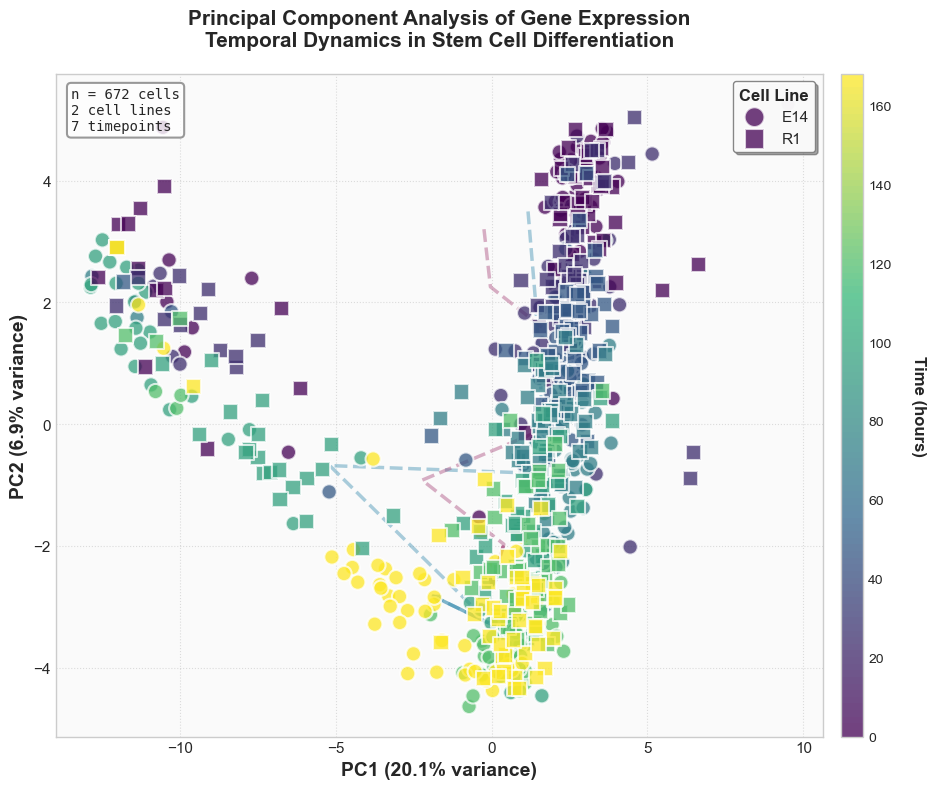


Generating 3D PCA visualization...
PC3 explains: 3.9% of variance
Total variance (3 PCs): 30.9%


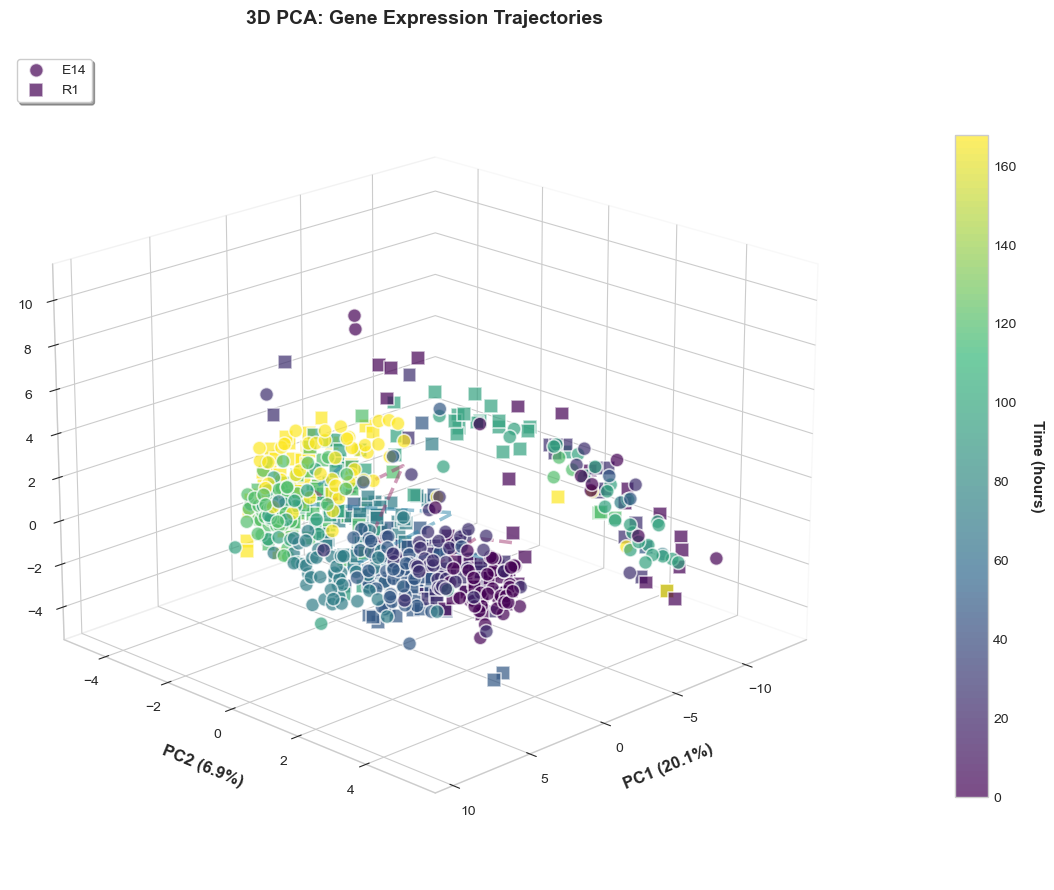

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib.patches import Ellipse
import matplotlib.patheffects as path_effects


gene_columns = [col for col in df.columns if col not in ['Time', 'Type']]


X = df[gene_columns].copy()
y_time = df['Time'].values
y_type = df['Type'].values


X_numeric = X.select_dtypes(include=[np.number])
print(f"Using {len(X_numeric.columns)} numeric features: {list(X_numeric.columns)}")


print(f"\nMissing values per gene:")
print(X_numeric.isnull().sum())
print(f"\nTotal missing values: {X_numeric.isnull().sum().sum()}")


imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric.values)

print(f"\nAfter imputation, missing values: {np.isnan(X_imputed).sum()}")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


pca2 = PCA(n_components=2, random_state=0)
X_pca2 = pca2.fit_transform(X_scaled)


print("\n" + "=" * 60)
print("PCA ANALYSIS SUMMARY")
print("=" * 60)
print(f"PC1 explains: {pca2.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"PC2 explains: {pca2.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"Total variance captured: {pca2.explained_variance_ratio_.sum()*100:.1f}%")
print("=" * 60)

# CREATE PCA PLOT 

# Set up the figure with a clean, professional style
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))


times = sorted(np.unique(y_time))
cell_types = sorted(np.unique(y_type))

print(f"\nCell types found: {cell_types}")
print(f"Time points: {times}")


color_options = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
colors_palette = {ct: color_options[i % len(color_options)] 
                  for i, ct in enumerate(cell_types)}

marker_options = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
markers_dict = {ct: marker_options[i % len(marker_options)] 
                for i, ct in enumerate(cell_types)}


from matplotlib.colors import LinearSegmentedColormap
colors_time = ['#440154', '#31688e', '#35b779', '#fde724']  # Viridis-like
n_bins = 100
cmap = LinearSegmentedColormap.from_list('custom_viridis', colors_time, N=n_bins)
norm = plt.Normalize(vmin=min(times), vmax=max(times))


for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    
    x_coords = X_pca2[mask, 0]
    y_coords = X_pca2[mask, 1]
    time_vals = y_time[mask]
    
    
    scatter = ax.scatter(
        x_coords, y_coords,
        c=time_vals,
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=120,  # Larger points
        alpha=0.75,
        edgecolors='white',
        linewidths=1.5,
        label=cell_type,
        zorder=3
    )


for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    # Group by time and calculate mean positions
    mean_positions = []
    for t in times:
        time_mask = mask & (y_time == t)
        if np.sum(time_mask) > 0:
            mean_x = X_pca2[time_mask, 0].mean()
            mean_y = X_pca2[time_mask, 1].mean()
            mean_positions.append([mean_x, mean_y])
    
    if len(mean_positions) > 1:
        mean_positions = np.array(mean_positions)
        ax.plot(mean_positions[:, 0], mean_positions[:, 1],
               color=colors_palette[cell_type],
               linestyle='--',
               linewidth=2.5,
               alpha=0.4,
               zorder=1)
        
        
        if len(mean_positions) >= 2:
            arrow_start = mean_positions[-2]
            arrow_end = mean_positions[-1]
            ax.annotate('',
                       xy=arrow_end, xytext=arrow_start,
                       arrowprops=dict(arrowstyle='->', 
                                     color=colors_palette[cell_type],
                                     lw=2.5, alpha=0.6),
                       zorder=1)


ax.set_xlabel(f'PC1 ({pca2.explained_variance_ratio_[0]*100:.1f}% variance)', 
             fontsize=14, fontweight='bold', fontfamily='sans-serif')
ax.set_ylabel(f'PC2 ({pca2.explained_variance_ratio_[1]*100:.1f}% variance)', 
             fontsize=14, fontweight='bold', fontfamily='sans-serif')

title = ax.set_title('Principal Component Analysis of Gene Expression\nTemporal Dynamics in Stem Cell Differentiation', 
                     fontsize=15, fontweight='bold', pad=20, fontfamily='sans-serif')


ax.tick_params(axis='both', which='major', labelsize=11)


ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.8, color='gray')
ax.set_axisbelow(True)


legend1 = ax.legend(loc='upper right', 
                   title='Cell Line',
                   title_fontsize=12,
                   fontsize=11,
                   frameon=True,
                   fancybox=True,
                   shadow=True,
                   framealpha=0.95,
                   edgecolor='gray',
                   markerscale=1.3)
legend1.get_title().set_fontweight('bold')


cbar = plt.colorbar(scatter, ax=ax, pad=0.02, aspect=30)
cbar.set_label('Time (hours)', 
              fontsize=12, fontweight='bold', 
              rotation=270, labelpad=25,
              fontfamily='sans-serif')
cbar.ax.tick_params(labelsize=10)


ax.set_facecolor('#fafafa')
fig.patch.set_facecolor('white')


textstr = f'n = {len(X_pca2)} cells\n{len(cell_types)} cell lines\n{len(times)} timepoints'
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray', linewidth=1.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, fontfamily='monospace')


plt.tight_layout()
plt.show()

#  OPTIONAL: 3D PCA VISUALIZATION 
print("\nGenerating 3D PCA visualization...")

pca3 = PCA(n_components=3, random_state=0)
X_pca3 = pca3.fit_transform(X_scaled)

print(f"PC3 explains: {pca3.explained_variance_ratio_[2]*100:.1f}% of variance")
print(f"Total variance (3 PCs): {pca3.explained_variance_ratio_.sum()*100:.1f}%")

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatter
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    scatter3d = ax.scatter(
        X_pca3[mask, 0],
        X_pca3[mask, 1],
        X_pca3[mask, 2],
        c=y_time[mask],
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=100,
        alpha=0.7,
        edgecolors='white',
        linewidths=1.2,
        label=cell_type
    )

# trajectory lines in 3D
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    mean_positions_3d = []
    for t in times:
        time_mask = mask & (y_time == t)
        if np.sum(time_mask) > 0:
            mean_x = X_pca3[time_mask, 0].mean()
            mean_y = X_pca3[time_mask, 1].mean()
            mean_z = X_pca3[time_mask, 2].mean()
            mean_positions_3d.append([mean_x, mean_y, mean_z])
    
    if len(mean_positions_3d) > 1:
        mean_positions_3d = np.array(mean_positions_3d)
        ax.plot(mean_positions_3d[:, 0], 
               mean_positions_3d[:, 1], 
               mean_positions_3d[:, 2],
               color=colors_palette[cell_type],
               linestyle='--',
               linewidth=2.5,
               alpha=0.5)


ax.set_xlabel(f'PC1 ({pca3.explained_variance_ratio_[0]*100:.1f}%)', 
             fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel(f'PC2 ({pca3.explained_variance_ratio_[1]*100:.1f}%)', 
             fontsize=12, fontweight='bold', labelpad=10)
ax.set_zlabel(f'PC3 ({pca3.explained_variance_ratio_[2]*100:.1f}%)', 
             fontsize=12, fontweight='bold', labelpad=10)

ax.set_title('3D PCA: Gene Expression Trajectories', 
            fontsize=14, fontweight='bold', pad=20)


ax.legend(loc='upper left', fontsize=10, frameon=True, shadow=True)
cbar = plt.colorbar(scatter3d, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Time (hours)', fontsize=11, fontweight='bold', rotation=270, labelpad=20)


ax.view_init(elev=20, azim=45)


ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Part 5. Dimensionality Reduction (Non-linear methods)
Non-linear dimensionality reduction (t-SNE, UMAP) methods usually produce better visualisations than PCA

1. Redo steps 1,3,4 of the previous part (keeping only 2 components, then 3 components) using a non-linear reduction method of your choice (**t-SNE** or **UMAP**). What do you observe ? How is the visulisation produced compared to the visual result of PCA ?


Bonus: Redo step 1 using the dimensionality reduction method **isomap** (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)


Genes used: 97
Missing values total: 672


C:\Users\ah616\Desktop\Sample_Project\env\Lib\site-packages\sklearn\impute\_base.py:641: UserWarning: Skipping features without any observed values: ['Unnamed: 99']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


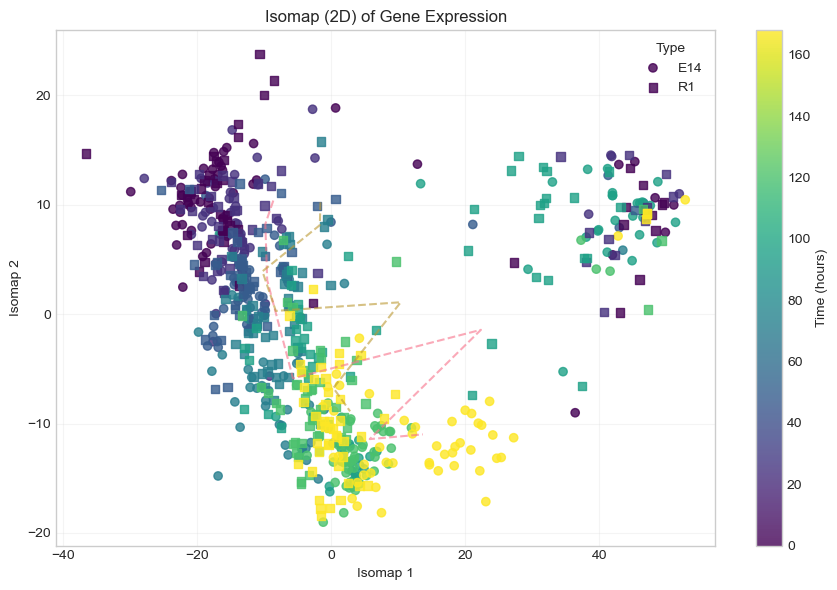

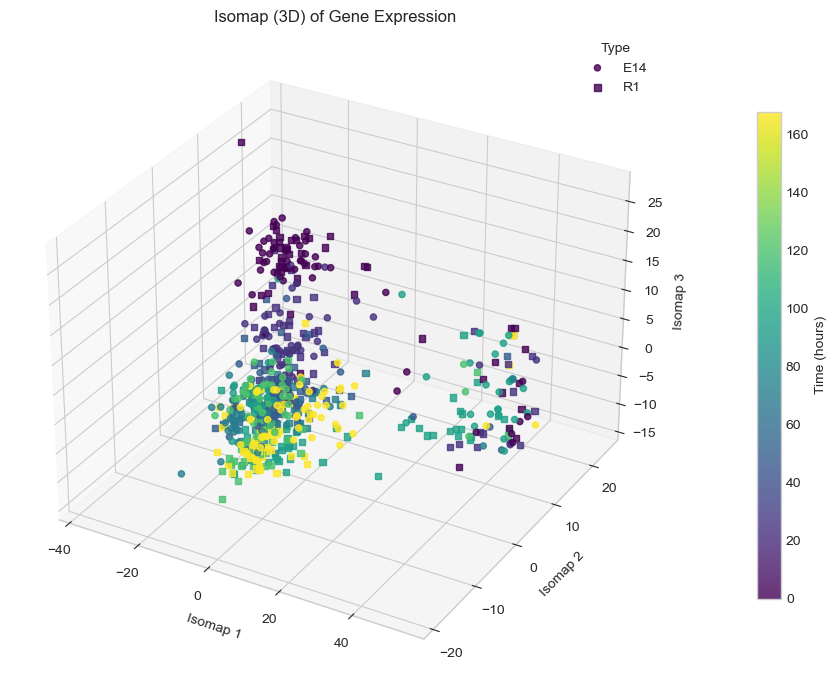

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

# 1) Prepare X, y 
gene_cols = [c for c in df.columns if c not in ["Time", "Type"]]
X = df[gene_cols].select_dtypes(include=[np.number])   # numeric genes only
y_time = df["Time"].values
y_type = df["Type"].values

print("Genes used:", len(X.columns))
print("Missing values total:", X.isna().sum().sum())

# 2) Impute missing + scale
X_imputed = SimpleImputer(strategy="mean").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)

times = sorted(np.unique(y_time))
types = sorted(np.unique(y_type))
markers = ["o", "s", "^", "D", "v", "<", ">", "p"]

#  3) Isomap 2D
iso2 = Isomap(n_components=2, n_neighbors=10)  # you can try 5, 10, 15
Z2 = iso2.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(9, 6))

for i, t in enumerate(types):
    mask = (y_type == t)
    sc = ax.scatter(
        Z2[mask, 0], Z2[mask, 1],
        c=y_time[mask],
        cmap="viridis",
        marker=markers[i % len(markers)],
        alpha=0.8,
        label=t
    )

# Optional: trajectory mean point per time
for t in types:
    mean_pts = []
    for tm in times:
        m = (y_type == t) & (y_time == tm)
        if np.any(m):
            mean_pts.append([Z2[m, 0].mean(), Z2[m, 1].mean()])
    mean_pts = np.array(mean_pts)
    if len(mean_pts) > 1:
        ax.plot(mean_pts[:, 0], mean_pts[:, 1], "--", alpha=0.6)

ax.set_title("Isomap (2D) of Gene Expression")
ax.set_xlabel("Isomap 1")
ax.set_ylabel("Isomap 2")
ax.grid(True, alpha=0.2)
ax.legend(title="Type")
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time (hours)")
plt.tight_layout()
plt.show()

# 4) Isomap 3D
from mpl_toolkits.mplot3d import Axes3D  # noqa

iso3 = Isomap(n_components=3, n_neighbors=10)
Z3 = iso3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

for i, t in enumerate(types):
    mask = (y_type == t)
    sc3 = ax.scatter(
        Z3[mask, 0], Z3[mask, 1], Z3[mask, 2],
        c=y_time[mask],
        cmap="viridis",
        marker=markers[i % len(markers)],
        alpha=0.8,
        label=t
    )

ax.set_title("Isomap (3D) of Gene Expression")
ax.set_xlabel("Isomap 1")
ax.set_ylabel("Isomap 2")
ax.set_zlabel("Isomap 3")
ax.legend(title="Type", loc="best")

cbar = plt.colorbar(sc3, ax=ax, shrink=0.75, pad=0.1)
cbar.set_label("Time (hours)")

plt.tight_layout()
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects

# Prepare data - extract only numeric gene expression columns
gene_columns = [col for col in df.columns if col not in ['Time', 'Type']]
X = df[gene_columns].copy()
y_time = df['Time'].values
y_type = df['Type'].values

# Handle non-numeric and missing values
X_numeric = X.select_dtypes(include=[np.number])
print(f"Using {len(X_numeric.columns)} genes for t-SNE analysis")
print(f"Missing values found: {X_numeric.isnull().sum().sum()}")

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric.values)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print(f"\nData shape: {X_scaled.shape}")
print(f"Samples: {X_scaled.shape[0]}, Features: {X_scaled.shape[1]}")

# Get unique values
times = sorted(np.unique(y_time))
cell_types = sorted(np.unique(y_type))

print(f"Cell types: {cell_types}")
print(f"Time points: {times}")

# Define sophisticated color palette
color_options = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
colors_palette = {ct: color_options[i % len(color_options)] 
                  for i, ct in enumerate(cell_types)}

marker_options = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
markers_dict = {ct: marker_options[i % len(marker_options)] 
                for i, ct in enumerate(cell_types)}

# Create beautiful time gradient colormap
colors_time = ['#440154', '#31688e', '#35b779', '#fde724']  # Viridis-like
cmap = LinearSegmentedColormap.from_list('custom_viridis', colors_time, N=100)
norm = plt.Normalize(vmin=min(times), vmax=max(times))

# ==================== 2D t-SNE ====================
print("\n" + "=" * 60)
print("Computing 2D t-SNE (this may take a minute)...")
print("=" * 60)

tsne2 = TSNE(n_components=2, 
             init='pca', 
             learning_rate='auto', 
             perplexity=30, 
             random_state=0,
             verbose=1)
X_tsne2 = tsne2.fit_transform(X_scaled)

print("2D t-SNE completed!")

# Create beautiful 2D plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 9))

# Plot each cell type
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    scatter = ax.scatter(
        X_tsne2[mask, 0], 
        X_tsne2[mask, 1],
        c=y_time[mask],
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=120,
        alpha=0.75,
        edgecolors='white',
        linewidths=1.5,
        label=cell_type,
        zorder=3
    )

# Add trajectory lines
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    # Calculate mean positions at each timepoint
    mean_positions = []
    for t in times:
        time_mask = mask & (y_time == t)
        if np.sum(time_mask) > 0:
            mean_x = X_tsne2[time_mask, 0].mean()
            mean_y = X_tsne2[time_mask, 1].mean()
            mean_positions.append([mean_x, mean_y])
    
    if len(mean_positions) > 1:
        mean_positions = np.array(mean_positions)
        ax.plot(mean_positions[:, 0], mean_positions[:, 1],
               color=colors_palette[cell_type],
               linestyle='--',
               linewidth=2.5,
               alpha=0.4,
               zorder=1)
        
        # Add directional arrow
        if len(mean_positions) >= 2:
            arrow_start = mean_positions[-2]
            arrow_end = mean_positions[-1]
            ax.annotate('',
                       xy=arrow_end, xytext=arrow_start,
                       arrowprops=dict(arrowstyle='->', 
                                     color=colors_palette[cell_type],
                                     lw=2.5, alpha=0.6),
                       zorder=1)

# Styling
ax.set_xlabel('t-SNE Dimension 1', fontsize=14, fontweight='bold', fontfamily='sans-serif')
ax.set_ylabel('t-SNE Dimension 2', fontsize=14, fontweight='bold', fontfamily='sans-serif')
ax.set_title('t-SNE Visualization of Gene Expression Dynamics\nNon-linear Dimensionality Reduction', 
            fontsize=15, fontweight='bold', pad=20, fontfamily='sans-serif')

# Grid and background
ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.8, color='gray')
ax.set_axisbelow(True)
ax.set_facecolor('#fafafa')
fig.patch.set_facecolor('white')

# Legend
legend = ax.legend(loc='best', 
                  title='Cell Line',
                  title_fontsize=12,
                  fontsize=11,
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  framealpha=0.95,
                  edgecolor='gray',
                  markerscale=1.3)
legend.get_title().set_fontweight('bold')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02, aspect=30)
cbar.set_label('Time (hours)', 
              fontsize=12, fontweight='bold', 
              rotation=270, labelpad=25)
cbar.ax.tick_params(labelsize=10)

# Info box
textstr = f'n = {len(X_tsne2)} cells\n{len(cell_types)} cell lines\n{len(times)} timepoints\nperplexity = 30'
props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='gray', linewidth=1.5)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, fontfamily='monospace')

plt.tight_layout()
plt.show()

# ==================== 3D t-SNE ====================
print("\n" + "=" * 60)
print("Computing 3D t-SNE (this may take a minute)...")
print("=" * 60)

tsne3 = TSNE(n_components=3, 
             init='pca', 
             learning_rate='auto', 
             perplexity=30, 
             random_state=0,
             verbose=1)
X_tsne3 = tsne3.fit_transform(X_scaled)

print("3D t-SNE completed!")

# Create beautiful 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cell type
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    scatter3d = ax.scatter(
        X_tsne3[mask, 0],
        X_tsne3[mask, 1],
        X_tsne3[mask, 2],
        c=y_time[mask],
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=100,
        alpha=0.7,
        edgecolors='white',
        linewidths=1.2,
        label=cell_type
    )

# Add 3D trajectory lines
for cell_type in cell_types:
    mask = (y_type == cell_type)
    
    mean_positions_3d = []
    for t in times:
        time_mask = mask & (y_time == t)
        if np.sum(time_mask) > 0:
            mean_x = X_tsne3[time_mask, 0].mean()
            mean_y = X_tsne3[time_mask, 1].mean()
            mean_z = X_tsne3[time_mask, 2].mean()
            mean_positions_3d.append([mean_x, mean_y, mean_z])
    
    if len(mean_positions_3d) > 1:
        mean_positions_3d = np.array(mean_positions_3d)
        ax.plot(mean_positions_3d[:, 0], 
               mean_positions_3d[:, 1], 
               mean_positions_3d[:, 2],
               color=colors_palette[cell_type],
               linestyle='--',
               linewidth=2.5,
               alpha=0.6,
               label=f'{cell_type} trajectory')

# Labels and styling
ax.set_xlabel('t-SNE 1', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('t-SNE 2', fontsize=12, fontweight='bold', labelpad=10)
ax.set_zlabel('t-SNE 3', fontsize=12, fontweight='bold', labelpad=10)
ax.set_title('3D t-SNE: Gene Expression Temporal Trajectories', 
            fontsize=14, fontweight='bold', pad=20)

# Legend
ax.legend(loc='upper left', fontsize=9, frameon=True, shadow=True, ncol=1)

# Colorbar
cbar = plt.colorbar(scatter3d, ax=ax, pad=0.1, shrink=0.7)
cbar.set_label('Time (hours)', fontsize=11, fontweight='bold', rotation=270, labelpad=20)
cbar.ax.tick_params(labelsize=9)

# Set optimal viewing angle
ax.view_init(elev=20, azim=45)

# Clean background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)

# Tick styling
ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()

# ==================== SIDE-BY-SIDE COMPARISON ====================
print("\nCreating side-by-side comparison...")

fig = plt.figure(figsize=(18, 7))

# Left: 2D t-SNE
ax1 = fig.add_subplot(121)

for cell_type in cell_types:
    mask = (y_type == cell_type)
    scatter = ax1.scatter(
        X_tsne2[mask, 0], 
        X_tsne2[mask, 1],
        c=y_time[mask],
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=100,
        alpha=0.75,
        edgecolors='white',
        linewidths=1.2,
        label=cell_type
    )

ax1.set_xlabel('t-SNE 1', fontsize=12, fontweight='bold')
ax1.set_ylabel('t-SNE 2', fontsize=12, fontweight='bold')
ax1.set_title('2D t-SNE Projection', fontsize=13, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.25, linestyle=':')
ax1.set_facecolor('#fafafa')
ax1.legend(loc='best', fontsize=9, frameon=True, shadow=True)

# Right: 3D t-SNE
ax2 = fig.add_subplot(122, projection='3d')

for cell_type in cell_types:
    mask = (y_type == cell_type)
    scatter3d = ax2.scatter(
        X_tsne3[mask, 0],
        X_tsne3[mask, 1],
        X_tsne3[mask, 2],
        c=y_time[mask],
        cmap=cmap,
        norm=norm,
        marker=markers_dict[cell_type],
        s=80,
        alpha=0.7,
        edgecolors='white',
        linewidths=1,
        label=cell_type
    )

ax2.set_xlabel('t-SNE 1', fontsize=11, fontweight='bold', labelpad=8)
ax2.set_ylabel('t-SNE 2', fontsize=11, fontweight='bold', labelpad=8)
ax2.set_zlabel('t-SNE 3', fontsize=11, fontweight='bold', labelpad=8)
ax2.set_title('3D t-SNE Projection', fontsize=13, fontweight='bold', pad=15)
ax2.view_init(elev=20, azim=45)
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.grid(True, alpha=0.3)

fig.suptitle('t-SNE Analysis: 2D vs 3D Comparison', 
            fontsize=16, fontweight='bold', y=0.98)

# Shared colorbar
cbar = plt.colorbar(scatter3d, ax=[ax1, ax2], pad=0.05, aspect=30, shrink=0.8)
cbar.set_label('Time (hours)', fontsize=12, fontweight='bold', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

print("\n✓ All t-SNE visualizations completed!")
